### Retail: Assess Sales Outlets' Performance

The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. 

Assess the performance of the chain's sales outlets.

Dashboard = https://public.tableau.com/profile/maria.fe.tarab#!/vizhome/Thenumberofpurchasesandcustomersperday/Thenumberofpurchasesandcustomersperday

Presentation = https://drive.google.com/file/d/1104AhSb69F_GFwUzOBcBW0P8cxTW6mmj/view?usp=sharing

* <a href="#Step 1">Data Preprocessing</a><br>
    * <a href="#productshape">Product shape</a><br>
    * <a href="#productinfo">Product info</a><br>
    * <a href="#retailshape">Retail shape</a><br>
    * <a href="#retailduplicate">Retail Duplicates</a><br>
    * <a href="#retailinfo">Retail info</a><br>
    * <a href="#retailboxplot">Retail Boxplot</a><br>
    * <a href="#retail_product">Retail and Product merged dataset</a><br>
        * <a href="#step1Conclusion">Conclusion</a><br>
* <a href="#Step 2">Exploratory Data Analysis</a><br>
    * <a href="#sales">Performance of every Sales outlets</a><br>
    * <a href="#customers">The proportion of  customers in every shop</a><br>
    * <a href="#no_id">Distribution of cutomers who does not have customer_id</a><br>
    * <a href="#per_day">Number of customers per day</a><br>
    * <a href="#peak_hour">Which hour of the day is the busiest?</a><br>
    * <a href="#loyalty">Proportion of customers of enrolled in loyalty program</a><br>
    * <a href="#purchase_dist">Number of Purchases per loyalty program membership</a><br>
    * <a href="#loyalty_dist">Distribution of Loyalty program enrollment for every shop</a><br>
    * <a href="#heatmap">the correlation between sales and loyalty program</a><br>
    * <a href="#hypothesis">Hypothesis Testing</a><br>
       * <a href="#step2conclusion">Conclusion</a><br>
* <a href="#Step 3">General Conclusion</a><br>
    

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import re
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

%matplotlib inline 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

<p><a name="Step 1"></a></p>

### Step 1. Data Preprocessing

In [3]:
try:
    product = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project/product_codes_us.csv', sep= ';')
except:
    product = pd.read_csv('/datasets/product_dataset_us.csv', sep= ';')
    
try:
    retail = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project/retail_dataset_us.csv', sep = ',')
except:
    retail = pd.read_csv('/datasets/retail_dataset_us.csv', dsep = ',')

In [4]:
#Print the head and tail of the product dataset
product.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [5]:
product.tail()

,productID,price_per_one
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55
3158,m,2.55


In [6]:
# change the column names to easily understand
product.columns = ['product_id', 'unit_price']

<p><a name="productshape"></a></p>

In [7]:
product.shape

(3159, 2)

In [8]:
#check for duplicates
duplicate= product.duplicated()
duplicate.sum()

0

<p><a name="productinfo"></a></p>

In [9]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3159 non-null   object 
 1   unit_price  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [10]:
#print and the head and tail of the retail dataset
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [11]:
retail.tail()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29
105334,543977,22384,9,2017-02-14 15:35:00,21294.0,0,Shop 19


In [12]:
# change the column names to easily understand
retail.columns = ['purchase_id', 'product_id', 'quantity', 'purchase_date', 'customer_id'
                  , 'loyalty_program', 'Shop_id' ]

<p><a name="retailshape"></a></p>

In [13]:
retail.shape

(105335, 7)

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   product_id       105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   Shop_id          105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [15]:
retail.isnull().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
Shop_id                0
dtype: int64

In [16]:
# checking for the Nan values in critic score column.
missing_customer = retail["customer_id"].isna().sum()
total = retail.index
number_of_rows = len(total)

# finding out the percentage of Nan values before dropping and replacing them.
missing_customer_id = missing_customer /  number_of_rows

print('the percentage of missing customer id in the data:', "{:.2%}". format(missing_customer_id))

the percentage of missing customer id in the data: 34.38%


the percentage or missing custmer_id is 34.38%, very high for the theoritically accepted missing values with is 25-30% of the data, but the missing value here could indicate that there are missing data in the information of the customer and so therefore  there is no customer id yet provided. Imputing it with median will affect the analysis so im imputing NaN values with 0 for better numerical calculation.

<p><a name="retailduplicate"></a></p

In [17]:
#check for duplicates
retail_duplicate= retail.duplicated().sum()

In [18]:
duplicated_rows = retail_duplicate / number_of_rows
print('the percentage of duplicated rows in the data:', "{:.2%}". format(duplicated_rows))

the percentage of duplicated rows in the data: 0.98%


In [19]:
#drop the duplicates
retail.drop_duplicates(inplace=True)
retail.duplicated().sum()

0

In [20]:
# fill the Nan values with 0.0
retail["customer_id"] = retail["customer_id"].fillna(value= 0.0)

#converting the columns from real numbers to int.
retail["customer_id"] = retail["customer_id"].astype(int)

# coverting the purchase_date column to datetime formats.
retail['purchase_date'] =  pd.to_datetime(retail['purchase_date'], format='%Y-%m-%d %H:%M:%S')

#Replacing 'Shop_id' column to numeric value
shop = retail['Shop_id'].str.extract(r'(\d+)', expand=False)


In [21]:
retail['Shop_id']= shop.astype(int) 


<p><a name="retailinfo"></a></p

In [22]:
# check the information of the dataset
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  int64         
 5   loyalty_program  104302 non-null  int64         
 6   Shop_id          104302 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.4+ MB


In [23]:
# call the describe to check the composition of the database
retail.describe()

,quantity,customer_id,loyalty_program,Shop_id
count,104302.000000,104302.000000,104302.000000,104302.000000
mean,7.883003,13729.314874,0.224464,9.882064
std,329.565540,10100.257229,0.417231,10.224251
min,-74216.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,2.000000,19423.000000,0.000000,7.000000
75%,7.000000,21692.000000,0.000000,19.000000
max,74214.000000,23962.000000,1.000000,30.000000


calling describe function to check the data conposition, we notice the huge negative number in quantity, and almost the same number in the maximubn, negative number means returned items. in this case it can be a wrong order qunatity and was returned.

<p><a name="retailboxplot"></a></p

The lower limit: 0.0
The upper limit: 17.5


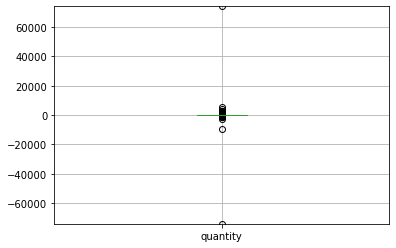

In [24]:
#calling the boxplot to determine the upperlimits of outliers
retail.boxplot('quantity')
plt.ylim(-74216, 74214)

Q1 = retail['quantity'].quantile(0.25)
Q3 = retail['quantity'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

The lower whisker starts at 0, the minimum value, and the upper limit one ends at about 17.5, which is 1.5 IQR above the third quartile. That is the approximate border of the "typical" range. Everything beyond it can usually be considered an outlier.

In [25]:
#filter the column of the data by removing the outliers in the column.

filtered_retail =  retail[( retail['quantity'] < 17.5) & ( retail['quantity'] > 0.0)]

In [26]:
# getting the date on of every purchase
filtered_retail ['purchase_day'] = retail['purchase_date'].dt.date
filtered_retail ['purchase_month'] = retail['purchase_date'].dt.month

In [27]:
# merge 2 dataset on product_id
product_retail  = filtered_retail.merge(product, on='product_id')
product_retail.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,Shop_id,purchase_day,purchase_month,unit_price
0,538280,21873,11,2016-12-10 12:50:00,18427,0,3,2016-12-10,12,0.42
1,540418,21873,1,2017-01-07 11:04:00,0,0,0,2017-01-07,1,0.42
2,541516,21873,2,2017-01-18 17:34:00,0,0,0,2017-01-18,1,0.42
3,538843,21873,1,2016-12-14 13:18:00,21712,0,9,2016-12-14,12,0.42
4,540838,21873,11,2017-01-11 15:13:00,19541,0,4,2017-01-11,1,0.42


<p><a name="retail_product"></a></p

In [28]:
#add new column of amount
product_retail['total_sales'] = product_retail['quantity'] * product_retail['unit_price']
product_retail.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,Shop_id,purchase_day,purchase_month,unit_price,total_sales
0,538280,21873,11,2016-12-10 12:50:00,18427,0,3,2016-12-10,12,0.42,4.62
1,540418,21873,1,2017-01-07 11:04:00,0,0,0,2017-01-07,1,0.42,0.42
2,541516,21873,2,2017-01-18 17:34:00,0,0,0,2017-01-18,1,0.42,0.84
3,538843,21873,1,2016-12-14 13:18:00,21712,0,9,2016-12-14,12,0.42,0.42
4,540838,21873,11,2017-01-11 15:13:00,19541,0,4,2017-01-11,1,0.42,4.62


In [29]:
shop_income = product_retail.groupby('Shop_id')['total_sales'].sum().reset_index()
shop_income.sort_values(by= 'total_sales', ascending=False).head()

,Shop_id,total_sales
0,0,76430.57
13,13,16825.88
28,28,15823.02
15,15,15354.51
20,20,15306.24


<p><a name="step1_conclusion"></a></p>

### Conclusion

We have 2 Datasets, the product data that contains 3159 rows and 2 columns, and the retail data which has 105323 rows and 7 columns, There are data types which are in wrong formats like purchase_date which are all in object so it was coverted to datetime64, The customer id has 34.38% of missing value and so therefore the NAN values was converted in 0 and  the format which is  real numbers was converted to int.There are also duplicated rows that was dropped.The minimun and maximum amount of orders has bee remove and the dataset was set according to the upper and lower limit of the quartile.


<p><a name="Step 2"></a></p>


### Step 2. Exploratory Data Analysis
* #### *Which Shop is the most Profitable?*

In [30]:
shop_revenue = shop_income.groupby('Shop_id')['total_sales'].sum()
shop_revenue.nlargest(10)

Shop_id
0     76430.57
13    16825.88
28    15823.02
15    15354.51
20    15306.24
22    14465.53
9     14453.59
10    13776.71
14    13682.08
11    13620.86
Name: total_sales, dtype: float64

In [31]:
# plot a pie for propostion distribution of chaoin and non chain establishments
shop_fig = go.Figure([go.Bar(x=shop_income['Shop_id'], y=shop_income['total_sales'])])

#update the layout
shop_fig.update_layout(
    title="Performance of every Sales outlets",
    xaxis_title="Shop ID",
    yaxis_title="Total Revenue",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

shop_fig.show()

By plotting the graph on the sales performance by outlets, we can see here that Shop id 0 has the highest number of sales while the rest of the shops has below 20K sales.

<p><a name="customers"></a></p>

### The proportion of  customers in every shop.

In [32]:
shop_customers = product_retail.groupby('Shop_id')['customer_id'].count().reset_index()
shop_customers.head().sort_values(by='customer_id', ascending=False)

,Shop_id,customer_id
0,0,16766
1,1,1669
2,2,1467
4,4,1202
3,3,1025


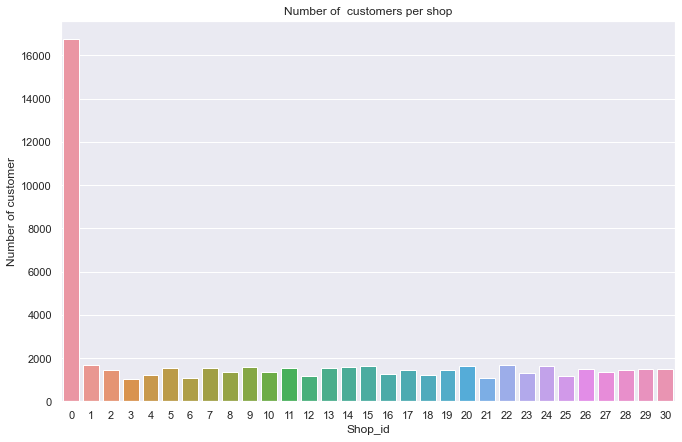

In [33]:
sns.set(rc={'figure.figsize':(11,7)})
sns.barplot(x = 'Shop_id', y = 'customer_id', data = shop_customers).set(
    title='Number of  customers per shop', xlabel='Shop_id', ylabel='Number of customer')

# Show the plot
plt.show()

When investigating on the number of  customers per shop, we found out that Shop hos the most number of customers it definately is related to having the highest revenue.

### proportion of cutomers who does not have customer ID

In [34]:
#group the customer_id according to 0 which stands for no customer id
no_ids = product_retail[(product_retail['customer_id'] == 0)]
no_ids 

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,Shop_id,purchase_day,purchase_month,unit_price,total_sales
1,540418,21873,1,2017-01-07 11:04:00,0,0,0,2017-01-07,1,0.42,0.42
2,541516,21873,2,2017-01-18 17:34:00,0,0,0,2017-01-18,1,0.42,0.84
9,540551,21873,1,2017-01-10 09:43:00,0,0,0,2017-01-10,1,0.42,0.42
11,541827,21873,2,2017-01-21 17:05:00,0,0,0,2017-01-21,1,0.42,0.84
14,540848,21873,1,2017-01-12 09:26:00,0,0,0,2017-01-12,1,0.42,0.42
...,...,...,...,...,...,...,...,...,...,...,...
59254,537640,48173c,6,2016-12-07 15:31:00,0,0,0,2016-12-07,12,16.63,99.78
59258,538130,90042C,9,2016-12-09 15:55:00,0,0,0,2016-12-09,12,0.00,0.00
59262,537434,84429A,1,2016-12-06 16:57:00,0,0,0,2016-12-06,12,2.95,2.95
59265,540821,84660B,1,2017-01-11 13:16:00,0,0,0,2017-01-11,1,1.25,1.25


In [35]:
no_id_customer = no_ids.groupby('Shop_id')['customer_id'].count().reset_index()
no_id_customer.head().sort_values(by='customer_id', ascending=False)

,Shop_id,customer_id
0,0,15232
1,6,98
3,25,28
2,21,14


<p><a name="no_id"></a></p>

In [36]:
# plot a pie for propostion distribution of chaoin and non chain establishments
no_id_fig = go.Figure([go.Bar(x=no_id_customer['Shop_id'], y=no_id_customer['customer_id'])])

#update the layout
no_id_fig.update_layout(
    title="Distribution of cutomers who does not have customer_id",
    xaxis_title="Shop ID",
    yaxis_title="Number of customer",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

no_id_fig.show()

There are customers that are labeled 0 meaning they don't have customer_id, by plotting a graph of those customers with spop_id we will know which outlet most of them went.Here it shows that shop 0 stands out as the shop that has most customers who does not have membership cards.

#### Are there any customers who does not have customers_id that are members of loyalty program?


In [37]:
# check if there the customers that does not have customer_id but enrolled in loyalty program
no_ids_program =no_ids.groupby('loyalty_program')['customer_id'].count().reset_index()
no_ids_program.head()

,loyalty_program,customer_id
0,0,15372


By checking the customers that does not have customers id if they belong to the loyalty program, it is confirmed that all of them belong to 0 or those who are not enrolled in the program.

#### When did those customer 0 came to the outlets?

In [38]:
no_ids_date = no_ids.groupby('purchase_day')['customer_id'].count().reset_index()

In [39]:
# plot a pie for propostion distribution of chaoin and non chain establishments
no_ids_fig = go.Figure([go.Bar(x=no_ids_date['purchase_day'], y=no_ids_date['customer_id'],  marker_color='lightsalmon')])

#update the layout
no_ids_fig.update_layout(
    title="Number of  walk-in customers per day",
    xaxis_title="Purchase date",
    yaxis_title="Number of customers",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

no_ids_fig.show()

Here we can see the flow of walk-in customers per date, as we all know most of this customers went to shop 0, the highest and lowest leak of visit happend on the month of december but we can see the regular flow of visit in almost every date. 

### Is there any time trend in purchases?


In [40]:
customer_per_date = product_retail.groupby('purchase_day')['customer_id'].count().reset_index()

<p><a name="per_day"></a></p>

In [41]:
# plot a pie for propostion distribution of chaoin and non chain establishments
customer_date_fig = go.Figure([go.Bar(x=customer_per_date['purchase_day'], y=customer_per_date['customer_id'])])

#update the layout
customer_date_fig.update_layout(
    title="Number of customers per day",
    xaxis_title="Purchase date",
    yaxis_title="Number of customers",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

customer_date_fig.show()

As we can see in the chart, there is higher volume of sales on the month of December, this has someting to do with the season and promotions being offered.The Gap on dates Dec. 24 - Jan 3 that shows no record of purchases could the time that outlet is close due to holiday break.

### Which hour of the day is the busiest?


<p><a name="peak_hour"></a></p>

In [42]:
#product_retail['Time'] = pd.to_datetime(product_retail['purchase_date'])
product_retail['Hour'] = (product_retail['purchase_date']).dt.hour
product_retail['Hour'].unique()

array([12, 11, 17, 13, 15,  9, 16, 18, 14,  8, 10, 19, 20,  7])

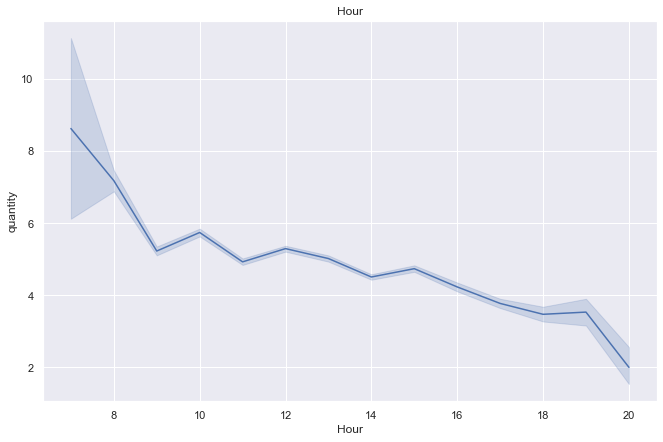

In [43]:
sns.lineplot(x="Hour",  y = 'quantity',data =product_retail).set_title("Hour");

Peak is observed before 8 am just after the opening hour. Hence, sales is typically lower in the afternoons.



### What is the proportion of customers of enrolled in loyalty program?

<p><a name="loyalty"></a></p>

By explicitly checking the customers that does not have customers id if they belong to the loyalty program, it is confirmed that all of them belong to 0 or those who are not enrolled in the program.

In [44]:
#exclude the customers that does not have customer id.
no_ids_ = product_retail[(product_retail['customer_id'] != 0)]

In [45]:
#group na new dataset by loyalty program and  customer
customer_program =no_ids_.groupby('loyalty_program')['customer_id'].count().reset_index()
customer_program.head()

,loyalty_program,customer_id
0,0,29141
1,1,14761


In [46]:
# Number of customers who enrolled in loyalty program
fig = px.pie(customer_program, values='customer_id', names='loyalty_program', title='Loyalty Program distribution')
fig.show()

Because I want to see the loyalty program distribution I excluded the customers that does not have customer_id, Plotting the pie chart we can see here  that 66.4% of the customers  are not enrolled in loyalty program while 33.6 % has registered to the program.



### What is the daily purchase distribution of customers who enrolled in loyalty program and those who dont?

In [47]:
# group the the customers that has enrolled in loyalty program
member = no_ids_[(no_ids_['loyalty_program'] == 1)]

In [48]:
member1= member.groupby(['loyalty_program', 'purchase_day'])['purchase_id'].count().reset_index()
member1.columns= ['program', 'purchase_day', 'total_purchase']
member1.head()

,program,purchase_day,total_purchase
0,1,2016-12-01,390
1,1,2016-12-02,599
2,1,2016-12-03,200
3,1,2016-12-05,453
4,1,2016-12-06,566


In [49]:
# group the the customers that has not enrolled in loyalty program
non_member = no_ids_[(no_ids_['loyalty_program'] == 0)]

In [50]:
member0= non_member.groupby(['loyalty_program', 'purchase_day'])['purchase_id'].count().reset_index()
member0.columns= ['program', 'purchase_day', 'total_purchase']
member0.head()

,program,purchase_day,total_purchase
0,0,2016-12-01,739
1,0,2016-12-02,700
2,0,2016-12-03,400
3,0,2016-12-05,1064
4,0,2016-12-06,609


<p><a name="purchase_dist"></a></p>

#### Graphical presentation of  purchases per date per group

In [51]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=member1['purchase_day'],
    y= member1['total_purchase'],
    name='member',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=member0['purchase_day'],
    y=member0['total_purchase'],
    name='non member',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

#update the layout
fig.update_layout(
    title="Daily Number of Purchases per loyalty program member and non member",
    xaxis_title="Purchase dates",
    yaxis_title="Number of Customers",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

fig.show()

When plotting a chart to find out the difference between the purchases of loyalty program members and non members, i found out that non members still brings the most number of purchases in every sales outlet.

### What are the proportions of member and non membership in loyalty program in every outlet?

In [52]:
shop_member1 = member.groupby(['Shop_id'])['purchase_id'].count().reset_index()


In [53]:
shop_member0 = non_member.groupby(['Shop_id'])['purchase_id'].count().reset_index()

<p><a name="loyalty_dist"></a></p>

In [54]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=shop_member1['Shop_id'],
    y= shop_member1['purchase_id'],
    name='member',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=shop_member0['Shop_id'],
    y=shop_member0['purchase_id'],
    name='non member',
    marker_color='dodgerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

#update the layout
fig.update_layout(
    title="Distribution of Loyalty program enrollment for every shop",
    xaxis_title="Shop Id",
    yaxis_title="Number of Purchases",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

fig.show()

By plotting a graph on the purchases of loyalty member and non members we can draw into conclusion that majority of customers who makes purchase are the non members. in the case of Shop 0, taking out the walk-in customers or those who does not have membership id makes the distribution of costumers the same with other shops. Shop 3 meanhile has most of its members enrolled in the loyalty program. 

#### The revenue of member and non membership in loyalty program in every outlet.

In [55]:
revenue_member1 = member.groupby(['Shop_id'])['total_sales'].count().reset_index()
revenue_member0 = non_member.groupby(['Shop_id'])['total_sales'].count().reset_index()

In [56]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=revenue_member1['Shop_id'],
    y= revenue_member1['total_sales'],
    name='member',
    marker_color='mediumpurple'
))
fig.add_trace(go.Bar(
    x=revenue_member0['Shop_id'],
    y=revenue_member0['total_sales'],
    name='non member',
    marker_color='orangered'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

#update the layout
fig.update_layout(
    title="Revenue of Loyalty program members and non members in every shop",
    xaxis_title="Shop Id",
    yaxis_title="Total Revenue",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

fig.show()

Plotting a graph of reveneu from loyalty program and members and non members in every sales outlet, it can confirmed that non members  bring more revenue in all outlets.

<p><a name="heatmap"></a></p>

### Is there a the correlation between sales and loyalty program?

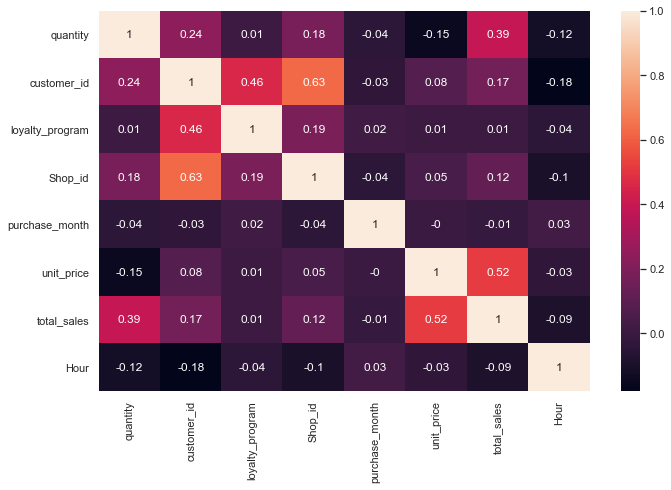

In [57]:
# check the correlation using sns heatmap
sns.heatmap(np.round(product_retail.corr(),2), annot=True);

Plotting the heatmap to see if there is a correlation between total sales and loyalty program, It scored only 0.01 meanin  there is no correlation between the  two.

<p><a name="Step3conclusion"></a></p>

**Step 3 Conclusion**

During this stage i found out that Shop 0 is the best performing sales outlet with an impressive number of customers, purchases and revenue. I also found out tha the reason for this is that majority of the customers who do not have customer_id or i will call them walk in customers went to Shop 0. When excluding those customer that has no membership id to the analysis, It turned out that most shop has the same number of unique customers.When trying to find out if loyalty program is a factor in the revenue, I also found out that those members who did not enroll in the loyalty program brings more revenue in all sales outlet. Also I plotted a correlation heatmap to see if there is a correlation between loyalty program and total_sales, i found out that there is no correlation and so i therefore conclude that loyalty program is not a factor in revenue of the outlets.We can also see a trend in purchase which happen on the months of december which is due to the season and promos on that month.



<p><a name="hypothesis"></a></p>

### Hypothesis Testing

* H0: The revenue of customers who enrolled in loyalty program are the same with those who dont.
* H1: The revenue of customers who enrolled in loyalty program are not the same with those who dont.

In [59]:
# use the column 
results = st.stats.ttest_ind(member['total_sales'], non_member['total_sales'], equal_var= False)

In [60]:
alpha = .05

In [61]:
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.410843929633067e-41
We reject the null hypothesis


When testing the hypothesis about the loyalty program , it turned out that the p-value is equal to alpha, meaning the null hypothesis is wrong The loyalty program has  significant difference on amount of purchases of those members who has loyalty membership and those who does not have-

<p><a name="Step 3"></a></p>

## General Conclusion

The dataset consist of records of customers of different sales outlets. Upon studying the data I found out the Shop 0 is the best performing outlet having the most number of sales and most number of customer. The rest of the shop has almost the same range of sales and number of customers. Looking further I found out that even though Home world is a membership store where all customer has membership id, there are 34.38% of customers who does not have costumer_id, it means that they are not member but rather random walk in costumers and more than 90% of those customers went to Shop 0. This would be the primary reason why this Shop stands out among number of costumers, sales and purchases. Looking at Loyalty membership enrollment as a factor in revenue of the shops. I also found that members who did not enrolled in loyalty program still brings more revenue and thus cannot be a factor that can be considered in terms on revenue. With this findings I would therefore encourage sales outlets to replicate the Shop 0 in terms of openness to walk-in customers while encouraging membership and further in loyalty program enrollment. In terms of monthly payment for the loyalty program, it would have been better to replace it with point system, meaning reaching a certain number of points in the purchases  will qualify a member to the loyalty program.